In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import RandomForestRegressor  # For regression modeling
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating models
from sklearn.cluster import KMeans  # For clustering
from sklearn.preprocessing import StandardScaler  # For scaling features


In [3]:
df = pd.read_csv('human_cognitive_performance.csv',)


In [4]:
print(df.head(5))

  User_ID  Age  Gender  Sleep_Duration  Stress_Level       Diet_Type  \
0      U1   57  Female             6.5             3  Non-Vegetarian   
1      U2   39  Female             7.6             9  Non-Vegetarian   
2      U3   26    Male             8.2             6      Vegetarian   
3      U4   32    Male             7.8             9      Vegetarian   
4      U5   50    Male             9.7             2  Non-Vegetarian   

   Daily_Screen_Time Exercise_Frequency  Caffeine_Intake  Reaction_Time  \
0                6.5             Medium               41         583.33   
1               10.8               High              214         368.24   
2                5.7                Low              429         445.21   
3                8.3                Low              464         286.33   
4               11.3             Medium              365         237.65   

   Memory_Test_Score  Cognitive_Score  AI_Predicted_Score  
0                 65            36.71               39.7

In [5]:
# Check basic information about the dataset
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB
None


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                Age  Sleep_Duration  Stress_Level  Daily_Screen_Time  \
count  80000.000000    80000.000000  80000.000000       80000.000000   
mean      38.525525        7.005332      5.493762           6.504646   
std       12.101876        1.734435      2.865308           3.167072   
min       18.000000        4.000000      1.000000           1.000000   
25%       28.000000        5.500000      3.000000           3.800000   
50%       39.000000        7.000000      5.000000           6.500000   
75%       49.000000        8.500000      8.000000           9.200000   
max       59.000000       10.000000     10.000000          12.000000   

       Caffeine_Intake  Reaction_Time  Memory_Test_Score  Cognitive_Score  \
count     80000.000000   80000.000000       80000.000000     80000.000000   
mean        248.988213     399.973579          69.498350        58.172395   
std         144.541990     115.369329          17.305659        23.058522   
min           0.000000

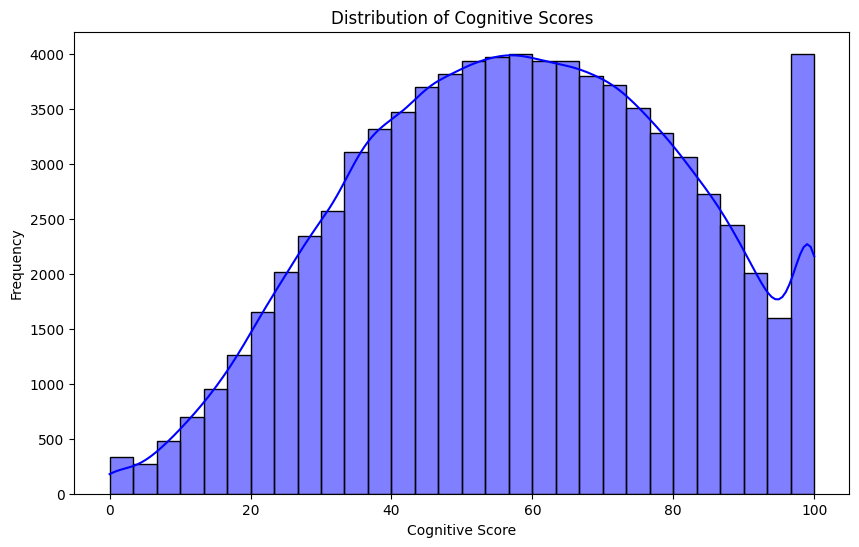

In [8]:
# Visualize the distribution of the Cognitive Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Cognitive_Score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Cognitive Scores')
plt.xlabel('Cognitive Score')
plt.ylabel('Frequency')
plt.show()

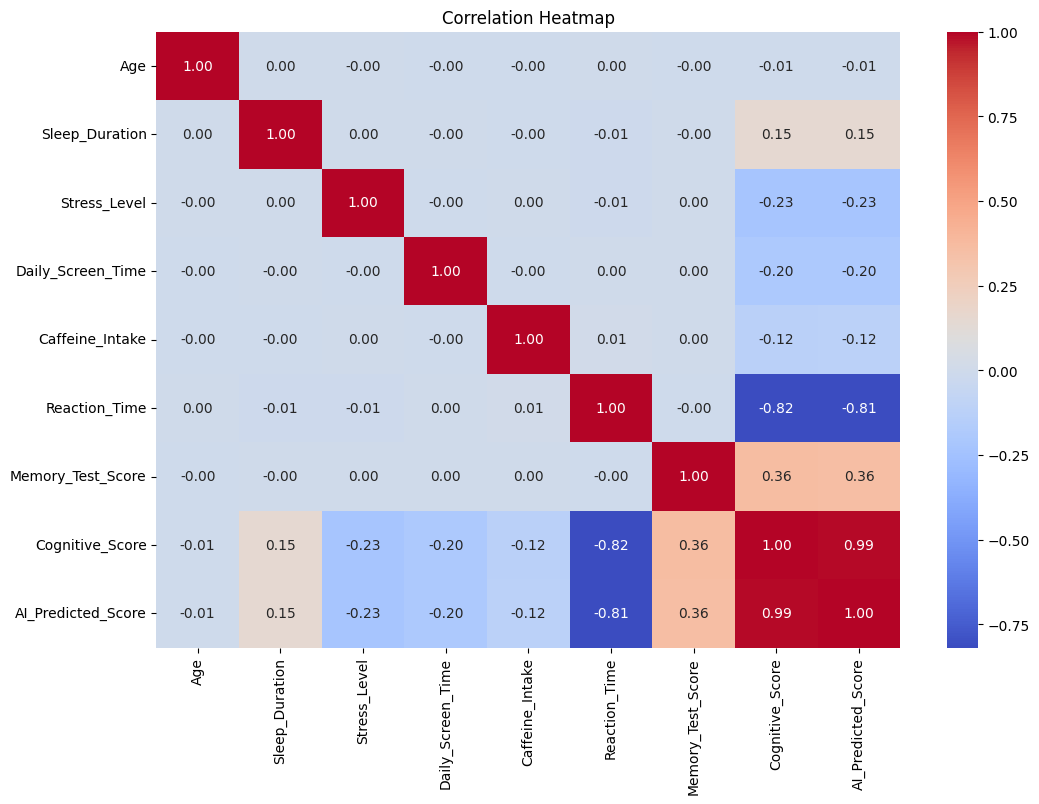

In [10]:
# Correlation heatmap to identify relationships between variables
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns from correlation calculation
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Encode categorical variables (e.g., Gender, Diet_Type)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
diet_mapping = {'Non-Vegetarian': 0, 'Vegetarian': 1, 'Vegan': 2}
df['Diet_Type'] = df['Diet_Type'].map(diet_mapping)


In [12]:
# Drop the User_ID column as it doesn't contribute to predictions
df.drop(columns=['User_ID'], inplace=True)


In [13]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Cognitive_Score', 'AI_Predicted_Score'])
y = df['Cognitive_Score']


In [15]:
# Scale numerical features
scaler = StandardScaler()
# Select only numerical features for scaling
numerical_features = X.select_dtypes(include=np.number).columns
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_features]), columns=numerical_features, index=X.index)
# If you need to keep the original columns, you can concatenate the scaled and non-scaled features:
#X = pd.concat([X_scaled, X.drop(columns=numerical_features)], axis=1)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 39.31
R^2 Score: 0.93


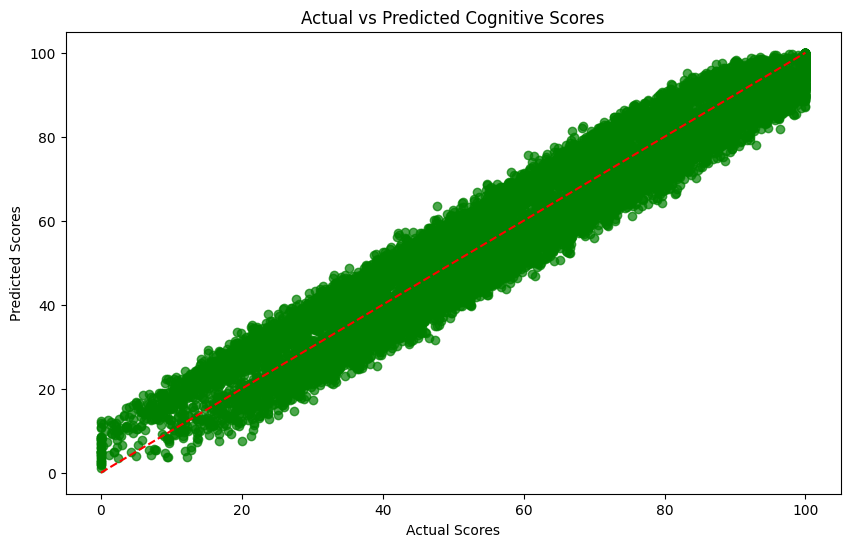

In [20]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Ideal line
plt.title('Actual vs Predicted Cognitive Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [22]:
df['Cluster'] = clusters

In [23]:
# Analyze the clusters
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())



Cluster Distribution:
Cluster
0    29050
1    25802
2    25148
Name: count, dtype: int64


In [24]:
# Visualize clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

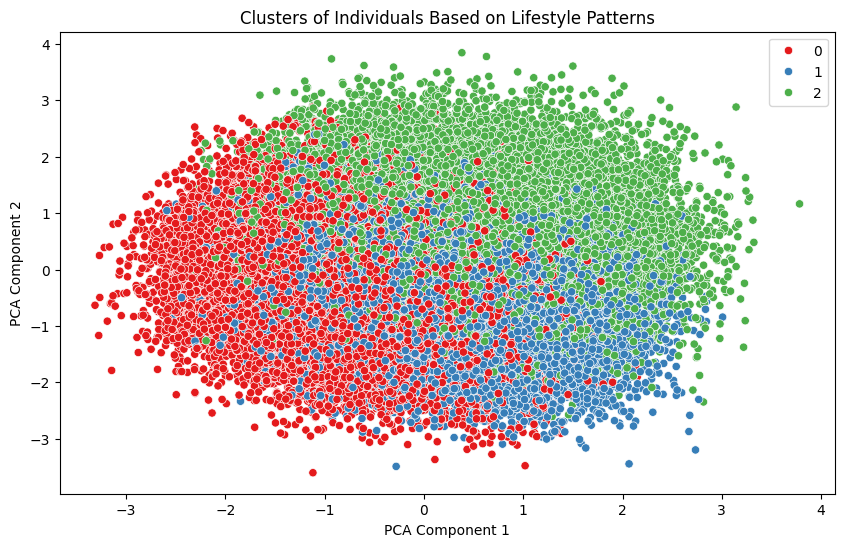

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters of Individuals Based on Lifestyle Patterns')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [26]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'cognitive_performance_model.pkl')

# To load the model later:
# loaded_model = joblib.load('cognitive_performance_model.pkl')

['cognitive_performance_model.pkl']